      Request id Pickup point  Driver id    Request timestamp  \
0            619      Airport        1.0      11/7/2016 11:51   
1            867      Airport        1.0      11/7/2016 17:57   
2           1807         City        1.0       12/7/2016 9:17   
3           2532      Airport        1.0      12/7/2016 21:08   
4           3112         City        1.0  13-07-2016 08:33:16   
...          ...          ...        ...                  ...   
6740        6745         City        NaN  15-07-2016 23:49:03   
6741        6752      Airport        NaN  15-07-2016 23:50:05   
6742        6751         City        NaN  15-07-2016 23:52:06   
6743        6754         City        NaN  15-07-2016 23:54:39   
6744        6753      Airport        NaN  15-07-2016 23:55:03   

           Drop timestamp             Status  
0         11/7/2016 13:00     Trip Completed  
1         11/7/2016 18:47     Trip Completed  
2          12/7/2016 9:58     Trip Completed  
3         12/7/2016 22:03     T

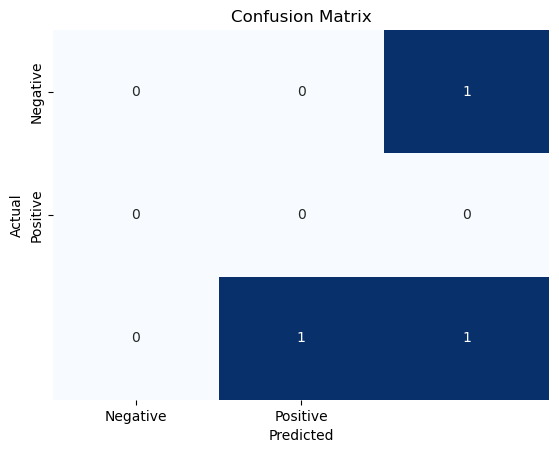

In [2]:
import numpy as np
import pandas as pd
import sckitlearn 

dataset = pd.read_csv(r"Uber Request Data.csv")
print(dataset)

print('===SELECTED DATASET===')
selected_dataset = pd.read_csv(r"selected data2.csv")
print(selected_dataset)

print('===Separate the dependent and independent variables===')
X = selected_dataset.iloc[:,:-1].values
print('===Independent Variables===')
print(X)
Y = selected_dataset.iloc[:,3].values
print('===Dependent Variables===')
print(Y)

print('###############################################################')
print('=====HANDLING MISSING DATA=====')
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 2] = imputer.fit_transform(X[:, 2].reshape(-1, 1)).flatten()
print(X)

print('###############################################################')
print('=====Categorical variables=====')
print('*****OneHot Encoder*****')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))
print(X)
print('*****Label Encoder*****')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(Y)

print('###############################################################')
print('===== Splitting the dataset =====')
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)
print('X_train')
print (X_train)
print ('----------------')
print('X_test')
print (X_test)
print ('----------------')
print ('Y_train')
print(Y_train)
print ('----------------')
print('Y_test')
print (Y_test)
print ('----------------')

print('###############################################################')
print('===== Feature Scaling =====')
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,2] = sc_X.fit_transform(X_train[:,2].reshape(-1, 1)).flatten()
X_test[:,2] = sc_X.transform(X_test[:,2].reshape(-1, 1)).flatten()
print('X_train')
print (X_train)
print ('----------------')
print('X_test')
print (X_test)
print ('----------------')

print('###############################################################')
print('===== Removing Outliers =====')
lowerLimit = selected_dataset['Driver id'].quantile(0.05)
upperLimit = selected_dataset['Driver id'].quantile(0.8)
# Filter out rows based on conditions
selected_dataset_Outlier = selected_dataset[(selected_dataset['Driver id'] >= lowerLimit) 
                                    & (selected_dataset['Driver id'] <= upperLimit)]
print(selected_dataset_Outlier)

print('###############################################################')
print('===== Removing Duplicate =====')
print(selected_dataset.drop_duplicates())

# print('###############################################################')
# print('===== Data Integration =====')
# dfIntersct = pd.merge(dataset,selected_dataset)
# print(dfIntersct)
# joinEmp1_Emp3 =dataset.join(selected_dataset)
# print(joinEmp1_Emp3)

print('===== Confusion Matrix =====')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print("Predicted labels (y_pred) for x_test:", y_pred)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of logistic regression:", accuracy)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
        xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()






In [8]:
    classreport = classification_report(Y_test,y_pred, zero_division=1) 

In [7]:
from sklearn.metrics import classification_report

In [9]:
print(classreport)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.00      1.00      0.00         0
           2       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.50      0.50      0.17         3
weighted avg       0.67      0.33      0.33         3

